In [152]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [91]:
df = pd.read_csv(r'C:\Users\Mayank1\Downloads\IPL\matches.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [4]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [63]:
df[df['id']==126]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
125,126,2009,Cape Town,2009-04-23,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,tie,0,Rajasthan Royals,0,0,YK Pathan,Newlands,MR Benson,M Erasmus,NaN


In [65]:
df2 = df[['season','win_by_runs']]
df2

,season,win_by_runs
0,2017,35
1,2017,0
2,2017,0
3,2017,0
4,2017,15
...,...,...
631,2016,0
632,2016,0
633,2016,22
634,2016,0


Text(0.5, 1.0, ' Average run margin victories per season')

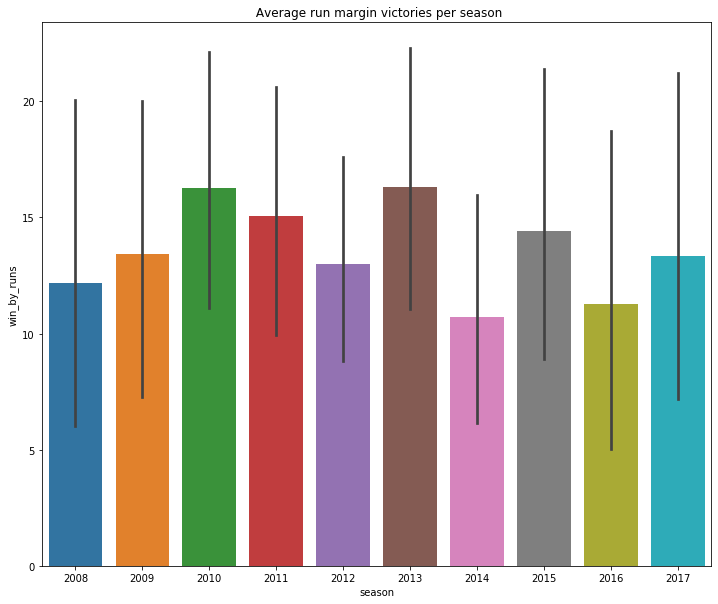

In [66]:
plt.figure(figsize=(12,10))
sn.barplot(df2['season'],df2['win_by_runs'])
plt.title(' Average run margin victories per season')

In [67]:
df2 = df2[~(df2['win_by_runs']==0)]

Text(0.5, 1.0, 'Win margin (Runs) frequency')

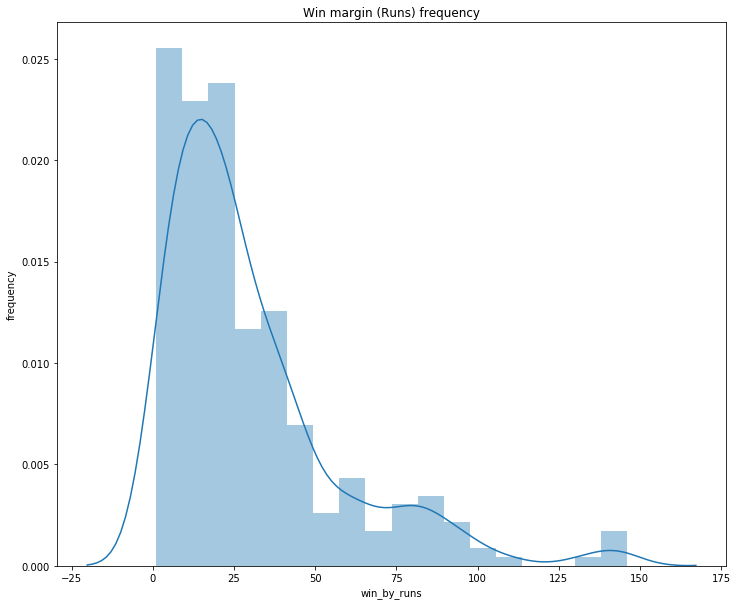

In [70]:
plt.figure(figsize=(12,10))
sn.distplot(df2['win_by_runs'])
plt.ylabel('frequency')
plt.title('Win margin (Runs) frequency')

In [71]:
df3 = df[['id','season','win_by_wickets','win_by_runs']]
df3

,id,season,win_by_wickets,win_by_runs
0,1,2017,0,35
1,2,2017,7,0
2,3,2017,10,0
3,4,2017,6,0
4,5,2017,0,15
...,...,...,...,...
631,632,2016,6,0
632,633,2016,4,0
633,634,2016,0,22
634,635,2016,4,0


Text(0.5, 1.0, 'Win margin (Wickets) frequency')

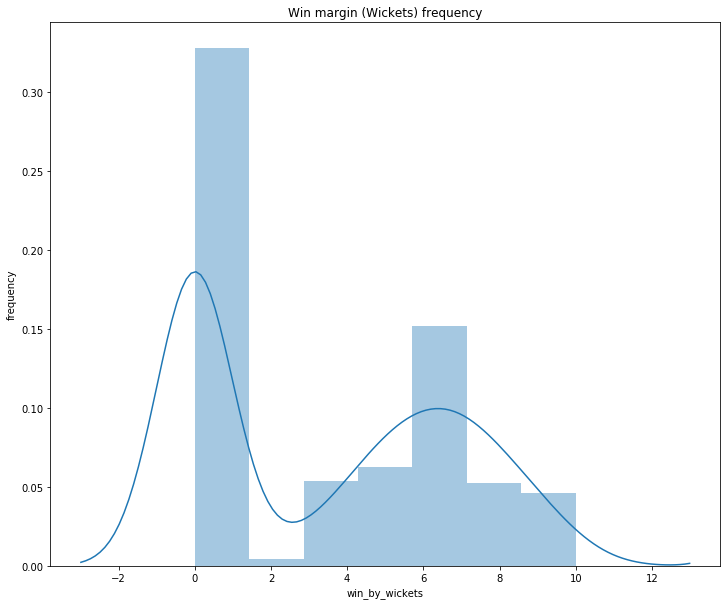

In [74]:
plt.figure(figsize=(12,10))
sn.distplot(df['win_by_wickets'])
plt.ylabel('frequency')
plt.title('Win margin (Wickets) frequency')

In [62]:
df3[(df3['win_by_wickets']==0) & (df3['win_by_runs']==0)]

,id,season,win_by_wickets,win_by_runs
33,34,2017,0,0
125,126,2009,0,0
189,190,2010,0,0
300,301,2011,0,0
387,388,2013,0,0
400,401,2013,0,0
475,476,2014,0,0
535,536,2015,0,0
545,546,2015,0,0
570,571,2015,0,0


In [135]:
df_2008= df[df['season']==2008]

In [136]:
df_2008 = df_2008.groupby(['winner','city'])[['id']].count().unstack()
df_2008

id                                     \
city                        Bangalore Chandigarh Chennai Delhi Hyderabad   
winner                                                                     
Chennai Super Kings               1.0        1.0     3.0   1.0       1.0   
Deccan Chargers                   NaN        NaN     1.0   NaN       NaN   
Delhi Daredevils                  1.0        NaN     1.0   4.0       1.0   
Kings XI Punjab                   1.0        6.0     NaN   1.0       1.0   
Kolkata Knight Riders             1.0        NaN     NaN   NaN       1.0   
Mumbai Indians                    1.0        NaN     NaN   NaN       1.0   
Rajasthan Royals                  1.0        NaN     1.0   NaN       1.0   
Royal Challengers Bangalore       1.0        NaN     1.0   NaN       1.0   

                                                   
city                        Jaipur Kolkata Mumbai  
winner                                             
Chennai Super Kings            NaN     1.0    1.0  
Deccan Chargers                NaN     NaN    1.0  
Delhi Daredevils               NaN     NaN    NaN  
Kings XI Punjab                NaN     NaN    1.0  
Kolkata Knight Riders          NaN     4.0    NaN  
Mumbai Indians                 NaN     1.0    4.0  
Rajasthan Royals               7.0     1.0    2.0  
Royal Challengers Bangalore    NaN     NaN    1.0

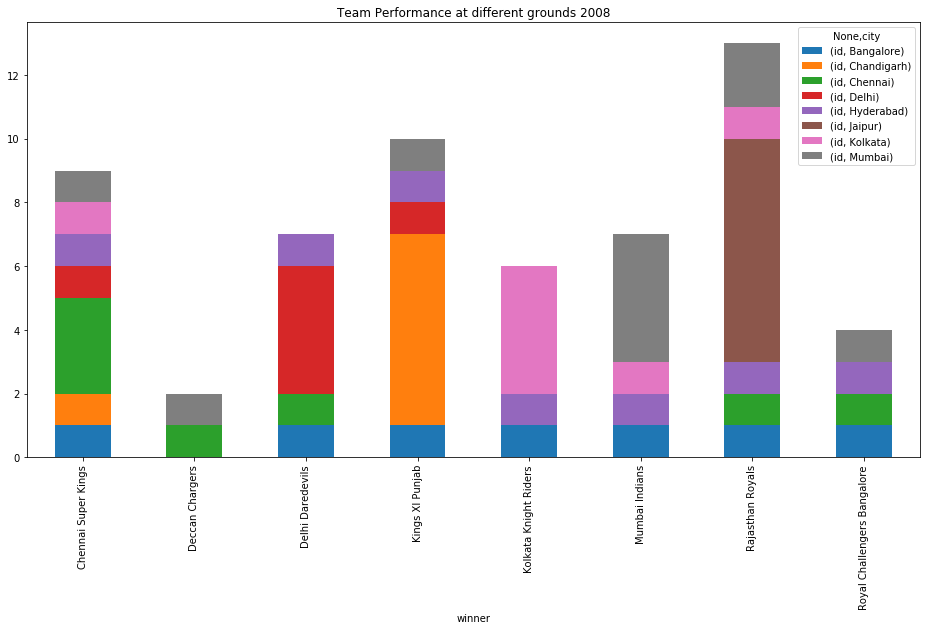

In [263]:
df_2008.plot(kind='bar',stacked='True',figsize=(16,8))
plt.title('Team Performance at different grounds 2008')
plt.show()

In [138]:
df_2009= df[df['season']==2009]
df_2009 = df_2009.groupby(['winner','city'])[['id']].count().unstack()
df_2009

id                             \
city                        Bloemfontein Cape Town Centurion Durban   
winner                                                                
Chennai Super Kings                  NaN       NaN       2.0    1.0   
Deccan Chargers                      NaN       2.0       2.0    2.0   
Delhi Daredevils                     1.0       1.0       2.0    3.0   
Kings XI Punjab                      1.0       1.0       NaN    2.0   
Kolkata Knight Riders                NaN       NaN       1.0    2.0   
Mumbai Indians                       NaN       1.0       1.0    NaN   
Rajasthan Royals                     NaN       1.0       2.0    2.0   
Royal Challengers Bangalore          NaN       1.0       2.0    3.0   

                                                                               
city                        East London Johannesburg Kimberley Port Elizabeth  
winner                                                                         
Chennai Super Kings                 1.0          1.0       1.0            2.0  
Deccan Chargers                     NaN          2.0       1.0            NaN  
Delhi Daredevils                    1.0          1.0       NaN            1.0  
Kings XI Punjab                     NaN          1.0       1.0            1.0  
Kolkata Knight Riders               NaN          NaN       NaN            NaN  
Mumbai Indians                      1.0          NaN       NaN            2.0  
Rajasthan Royals                    NaN          NaN       NaN            1.0  
Royal Challengers Bangalore         NaN          3.0       NaN            NaN

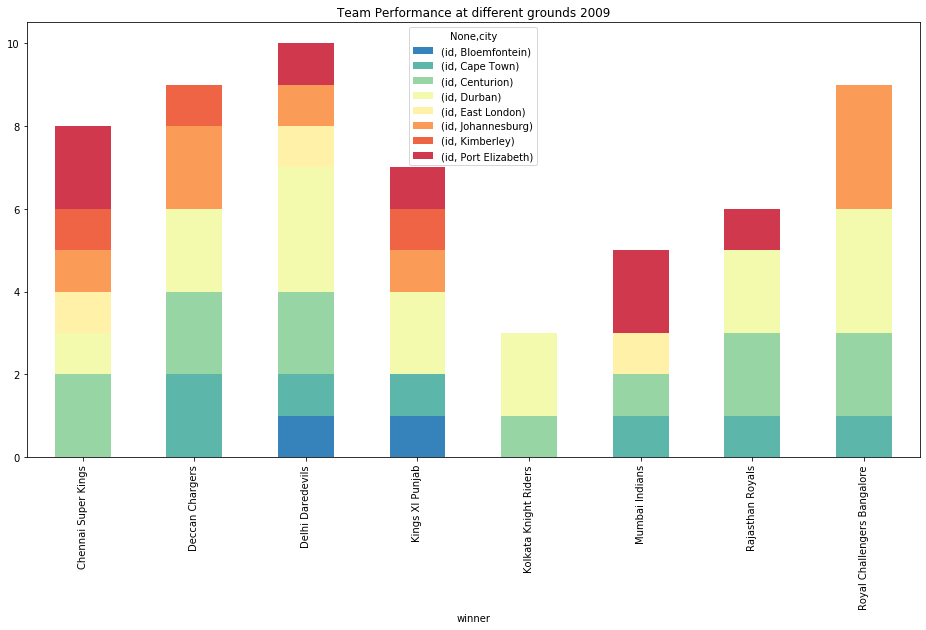

In [264]:
df_2009.plot(kind='bar',stacked='True',figsize=(16,8),colormap=ListedColormap(sn.color_palette("Spectral_r", 10)))
plt.title('Team Performance at different grounds 2009')
plt.show()

In [159]:
df_2010= df[df['season']==2010]
df_2010 = df_2010.groupby(['winner','city'])[['id']].count().unstack()
df_2010

id                                       \
city                        Ahmedabad Bangalore Chandigarh Chennai Cuttack   
winner                                                                       
Chennai Super Kings               NaN       NaN        NaN     4.0     NaN   
Deccan Chargers                   NaN       1.0        NaN     1.0     2.0   
Delhi Daredevils                  1.0       1.0        1.0     1.0     NaN   
Kings XI Punjab                   NaN       NaN        1.0     1.0     NaN   
Kolkata Knight Riders             NaN       NaN        1.0     NaN     NaN   
Mumbai Indians                    NaN       1.0        NaN     NaN     NaN   
Rajasthan Royals                  3.0       NaN        1.0     NaN     NaN   
Royal Challengers Bangalore       NaN       4.0        1.0     NaN     NaN   

                                                                           
city                        Delhi Dharamsala Jaipur Kolkata Mumbai Nagpur  
winner                                                                     
Chennai Super Kings           1.0        1.0    NaN     1.0    2.0    NaN  
Deccan Chargers               1.0        1.0    NaN     NaN    NaN    2.0  
Delhi Daredevils              3.0        NaN    NaN     NaN    NaN    NaN  
Kings XI Punjab               1.0        NaN    NaN     1.0    NaN    NaN  
Kolkata Knight Riders         NaN        NaN    NaN     5.0    1.0    NaN  
Mumbai Indians                1.0        NaN    1.0     NaN    8.0    NaN  
Rajasthan Royals              NaN        NaN    1.0     NaN    NaN    1.0  
Royal Challengers Bangalore   NaN        NaN    1.0     NaN    2.0    NaN

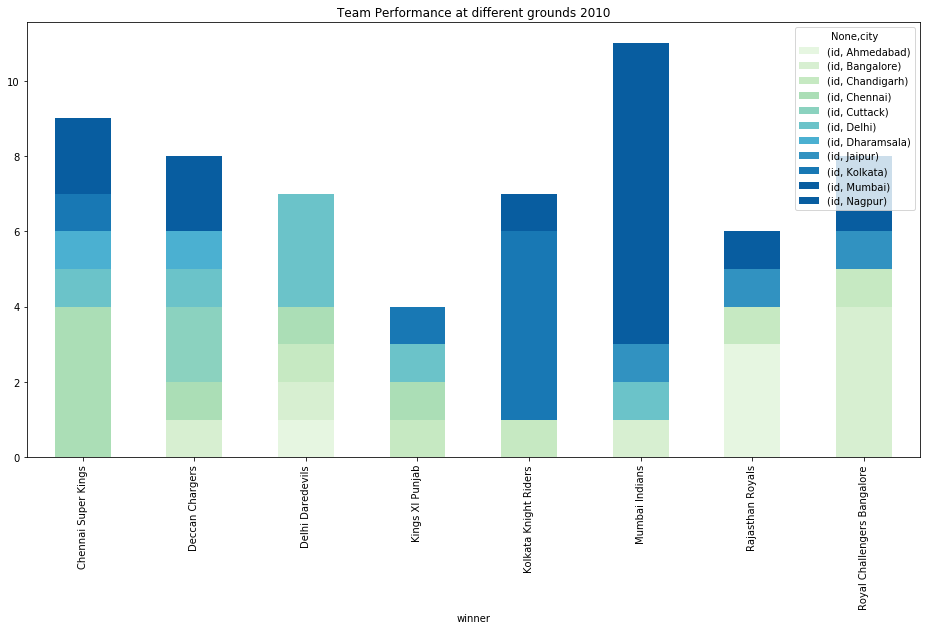

In [265]:
df_2010.plot(kind='bar',stacked='True',figsize=(16,8),colormap=ListedColormap(sn.color_palette("GnBu", 10)))
plt.title('Team Performance at different grounds 2010')
plt.show()

In [162]:
df_2011= df[df['season']==2011]
df_2011 = df_2011.groupby(['winner','city'])[['id']].count().unstack()
df_2011

id                                      \
city                        Bangalore Chandigarh Chennai Delhi Dharamsala   
winner                                                                      
Chennai Super Kings               NaN        NaN     8.0   NaN        NaN   
Deccan Chargers                   NaN        NaN     NaN   1.0        1.0   
Delhi Daredevils                  NaN        NaN     NaN   1.0        NaN   
Kings XI Punjab                   NaN        3.0     NaN   NaN        2.0   
Kochi Tuskers Kerala              NaN        NaN     NaN   1.0        NaN   
Kolkata Knight Riders             NaN        NaN     NaN   1.0        NaN   
Mumbai Indians                    1.0        NaN     NaN   1.0        NaN   
Pune Warriors                     NaN        1.0     NaN   NaN        NaN   
Rajasthan Royals                  NaN        NaN     NaN   NaN        NaN   
Royal Challengers Bangalore       5.0        NaN     1.0   1.0        NaN   

                                                                          
city                        Hyderabad Indore Jaipur Kochi Kolkata Mumbai  
winner                                                                    
Chennai Super Kings               NaN    NaN    1.0   NaN     NaN    2.0  
Deccan Chargers                   1.0    NaN    NaN   1.0     NaN    2.0  
Delhi Daredevils                  1.0    NaN    NaN   1.0     NaN    1.0  
Kings XI Punjab                   1.0    1.0    NaN   NaN     NaN    NaN  
Kochi Tuskers Kerala              NaN    1.0    NaN   2.0     1.0    1.0  
Kolkata Knight Riders             1.0    NaN    1.0   NaN     4.0    1.0  
Mumbai Indians                    1.0    NaN    NaN   NaN     1.0    6.0  
Pune Warriors                     1.0    NaN    NaN   NaN     NaN    2.0  
Rajasthan Royals                  1.0    NaN    4.0   NaN     NaN    1.0  
Royal Challengers Bangalore       NaN    NaN    1.0   1.0     1.0    NaN

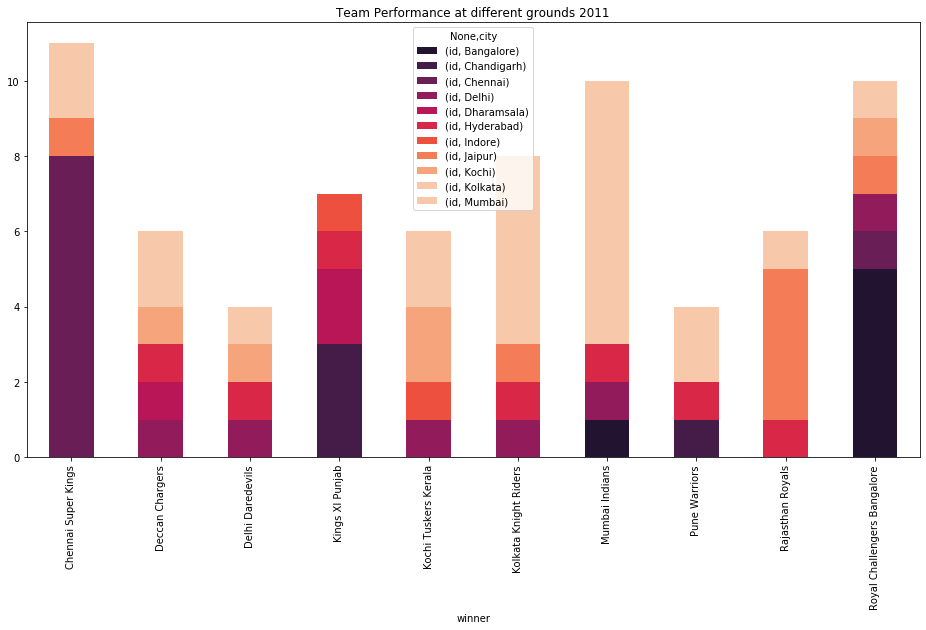

In [266]:
df_2011.plot(kind='bar',stacked='True',figsize=(16,8),colormap=ListedColormap(sn.color_palette("rocket", 10)))
plt.title('Team Performance at different grounds 2011')
plt.show()

In [166]:
df_2012= df[df['season']==2012]
df_2012 = df_2012.groupby(['winner','city'])[['id']].count().unstack()
df_2012

id                                   \
city                        Bangalore Chandigarh Chennai Cuttack Delhi   
winner                                                                   
Chennai Super Kings               1.0        NaN     6.0     NaN   NaN   
Deccan Chargers                   NaN        NaN     NaN     1.0   NaN   
Delhi Daredevils                  NaN        NaN     NaN     NaN   5.0   
Kings XI Punjab                   1.0        2.0     1.0     NaN   NaN   
Kolkata Knight Riders             1.0        1.0     2.0     1.0   1.0   
Mumbai Indians                    1.0        1.0     1.0     NaN   NaN   
Pune Warriors                     NaN        NaN     NaN     NaN   1.0   
Rajasthan Royals                  1.0        1.0     NaN     NaN   NaN   
Royal Challengers Bangalore       3.0        1.0     NaN     NaN   1.0   

                                                                             \
city                        Dharamsala Hyderabad Jaipur Kolkata Mumbai Pune   
winner                                                                        
Chennai Super Kings                NaN       NaN    1.0     1.0    NaN  NaN   
Deccan Chargers                    NaN       2.0    NaN     NaN    NaN  1.0   
Delhi Daredevils                   1.0       1.0    1.0     1.0    1.0  1.0   
Kings XI Punjab                    1.0       1.0    NaN     1.0    1.0  NaN   
Kolkata Knight Riders              NaN       NaN    NaN     3.0    1.0  2.0   
Mumbai Indians                     NaN       NaN    1.0     1.0    3.0  1.0   
Pune Warriors                      NaN       NaN    NaN     NaN    1.0  2.0   
Rajasthan Royals                   NaN       NaN    4.0     NaN    NaN  1.0   
Royal Challengers Bangalore        NaN       NaN    1.0     NaN    1.0  1.0   

                                           
city                        Visakhapatnam  
winner                                     
Chennai Super Kings                   1.0  
Deccan Chargers                       NaN  
Delhi Daredevils                      NaN  
Kings XI Punjab                       NaN  
Kolkata Knight Riders                 NaN  
Mumbai Indians                        1.0  
Pune Warriors                         NaN  
Rajasthan Royals                      NaN  
Royal Challengers Bangalore           NaN

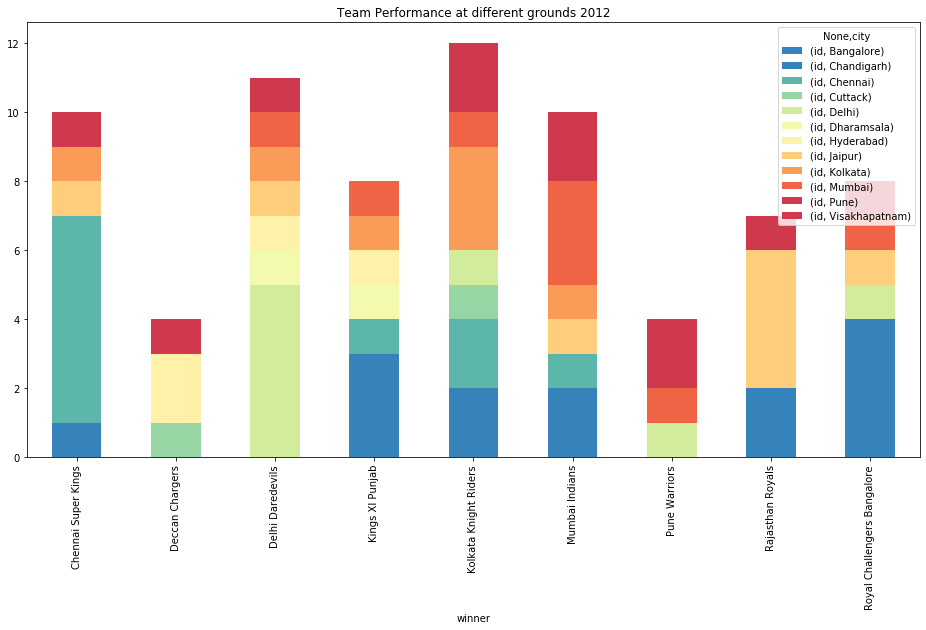

In [267]:
df_2012.plot(kind='bar',stacked='True',figsize=(16,8),colormap=ListedColormap(sn.color_palette("Spectral_r", 10)))
plt.title('Team Performance at different grounds 2012')
plt.show()

In [169]:
df_2013= df[df['season']==2013]
df_2013 = df_2013.groupby(['winner','city'])[['id']].count().unstack()
df_2013

id                                      \
city                        Bangalore Chandigarh Chennai Delhi Dharamsala   
winner                                                                      
Chennai Super Kings               NaN        1.0     6.0   2.0        NaN   
Delhi Daredevils                  NaN        NaN     NaN   1.0        NaN   
Kings XI Punjab                   1.0        3.0     NaN   1.0        2.0   
Kolkata Knight Riders             NaN        NaN     NaN   NaN        NaN   
Mumbai Indians                    NaN        NaN     1.0   NaN        NaN   
Pune Warriors                     NaN        NaN     1.0   NaN        NaN   
Rajasthan Royals                  NaN        1.0     NaN   2.0        NaN   
Royal Challengers Bangalore       7.0        NaN     NaN   1.0        NaN   
Sunrisers Hyderabad               NaN        1.0     NaN   1.0        NaN   

                                                                                
city                        Hyderabad Jaipur Kolkata Mumbai Pune Raipur Ranchi  
winner                                                                          
Chennai Super Kings               1.0    NaN     1.0    NaN  1.0    NaN    NaN  
Delhi Daredevils                  NaN    NaN     NaN    NaN  NaN    2.0    NaN  
Kings XI Punjab                   NaN    NaN     NaN    NaN  1.0    NaN    NaN  
Kolkata Knight Riders             NaN    NaN     4.0    NaN  1.0    NaN    1.0  
Mumbai Indians                    NaN    NaN     3.0    8.0  1.0    NaN    NaN  
Pune Warriors                     NaN    NaN     NaN    NaN  2.0    NaN    1.0  
Rajasthan Royals                  NaN    8.0     NaN    NaN  NaN    NaN    NaN  
Royal Challengers Bangalore       NaN    NaN     NaN    NaN  1.0    NaN    NaN  
Sunrisers Hyderabad               7.0    NaN     NaN    NaN  1.0    NaN    NaN

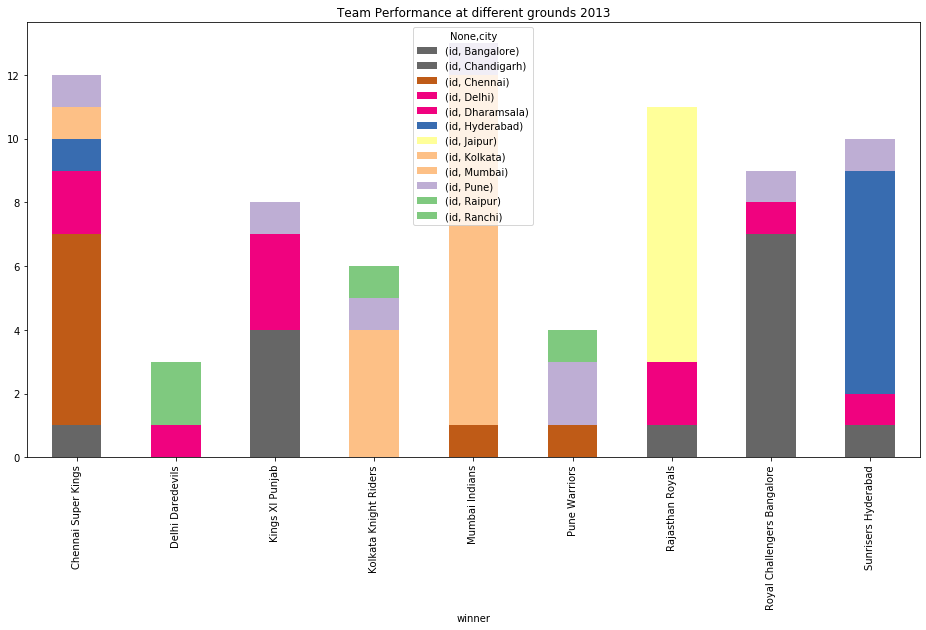

In [268]:
df_2013.plot(kind='bar',stacked='True',figsize=(16,8),colormap=ListedColormap(sn.color_palette("Accent_r", 10)))
plt.title('Team Performance at different grounds 2013')
plt.show()

In [185]:
df_2014= df[df['season']==2014]
df_2014 = df_2014.groupby(['winner','city'])[['id']].count().unstack()
df_2014

id                                         \
city                        Abu Dhabi Ahmedabad Bangalore Chandigarh Cuttack   
winner                                                                         
Chennai Super Kings               1.0       NaN       1.0        NaN     NaN   
Delhi Daredevils                  NaN       NaN       NaN        NaN     NaN   
Kings XI Punjab                   2.0       NaN       1.0        2.0     1.0   
Kolkata Knight Riders             1.0       NaN       1.0        NaN     2.0   
Mumbai Indians                    NaN       1.0       NaN        1.0     NaN   
Rajasthan Royals                  3.0       2.0       1.0        NaN     NaN   
Royal Challengers Bangalore       NaN       NaN       2.0        NaN     NaN   
Sunrisers Hyderabad               NaN       1.0       NaN        NaN     NaN   

                                                                           
city                        Delhi Hyderabad Kolkata Mumbai Ranchi Sharjah  
winner                                                                     
Chennai Super Kings           1.0       NaN     NaN    2.0    2.0     1.0  
Delhi Daredevils              NaN       NaN     NaN    NaN    NaN     1.0  
Kings XI Punjab               1.0       1.0     NaN    1.0    NaN     2.0  
Kolkata Knight Riders         1.0       1.0     4.0    NaN    NaN     1.0  
Mumbai Indians                NaN       1.0     NaN    4.0    NaN     NaN  
Rajasthan Royals              1.0       NaN     NaN    NaN    NaN     NaN  
Royal Challengers Bangalore   NaN       NaN     NaN    NaN    1.0     1.0  
Sunrisers Hyderabad           1.0       1.0     NaN    NaN    1.0     NaN

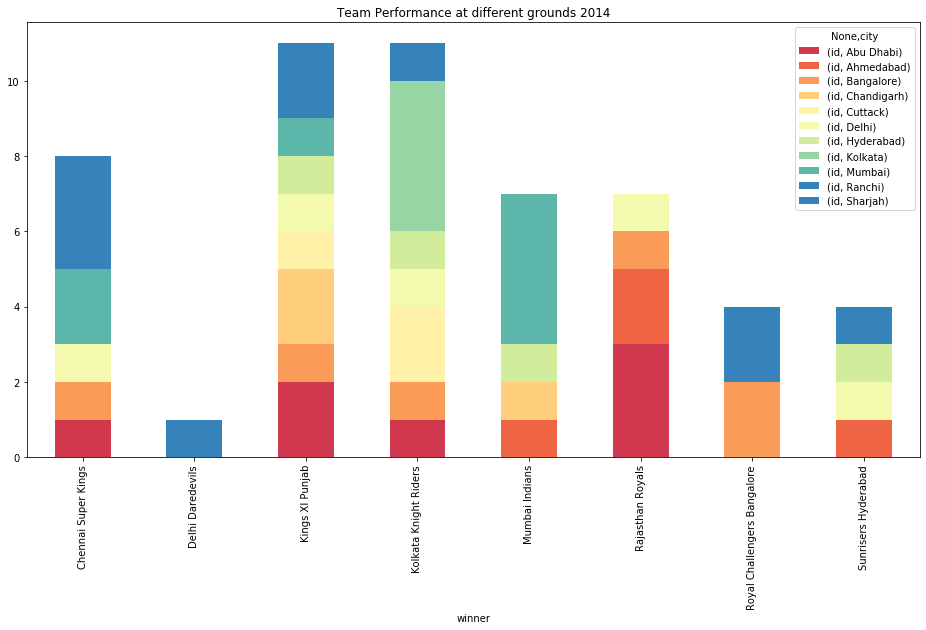

In [269]:
df_2014.plot(kind='bar',stacked='True',figsize=(16,8),colormap=ListedColormap(sn.color_palette("Spectral", 10)))
plt.title('Team Performance at different grounds 2014')
plt.show()

In [200]:
df_2015= df[df['season']==2015]
df_2015 = df_2015.groupby(['winner','city'])[['id']].count().unstack()
df_2015

id                                     \
city                        Ahmedabad Bangalore Chandigarh Chennai Delhi   
winner                                                                     
Chennai Super Kings               NaN       1.0        1.0     6.0   NaN   
Delhi Daredevils                  NaN       NaN        NaN     NaN   2.0   
Kings XI Punjab                   1.0       NaN        1.0     NaN   NaN   
Kolkata Knight Riders             NaN       NaN        NaN     NaN   1.0   
Mumbai Indians                    NaN       1.0        1.0     1.0   NaN   
Rajasthan Royals                  2.0       NaN        NaN     NaN   1.0   
Royal Challengers Bangalore       1.0       2.0        NaN     NaN   1.0   
Sunrisers Hyderabad               NaN       1.0        1.0     NaN   NaN   

                                                                         \
city                        Hyderabad Kolkata Mumbai Pune Raipur Ranchi   
winner                                                                    
Chennai Super Kings               NaN     NaN    1.0  NaN    NaN    1.0   
Delhi Daredevils                  NaN     NaN    NaN  1.0    1.0    NaN   
Kings XI Punjab                   NaN     NaN    1.0  NaN    NaN    NaN   
Kolkata Knight Riders             NaN     5.0    NaN  1.0    NaN    NaN   
Mumbai Indians                    1.0     1.0    5.0  NaN    NaN    NaN   
Rajasthan Royals                  NaN     NaN    2.0  1.0    NaN    NaN   
Royal Challengers Bangalore       1.0     1.0    1.0  1.0    NaN    NaN   
Sunrisers Hyderabad               2.0     NaN    1.0  NaN    1.0    NaN   

                                           
city                        Visakhapatnam  
winner                                     
Chennai Super Kings                   NaN  
Delhi Daredevils                      1.0  
Kings XI Punjab                       NaN  
Kolkata Knight Riders                 NaN  
Mumbai Indians                        NaN  
Rajasthan Royals                      1.0  
Royal Challengers Bangalore           NaN  
Sunrisers Hyderabad                   1.0

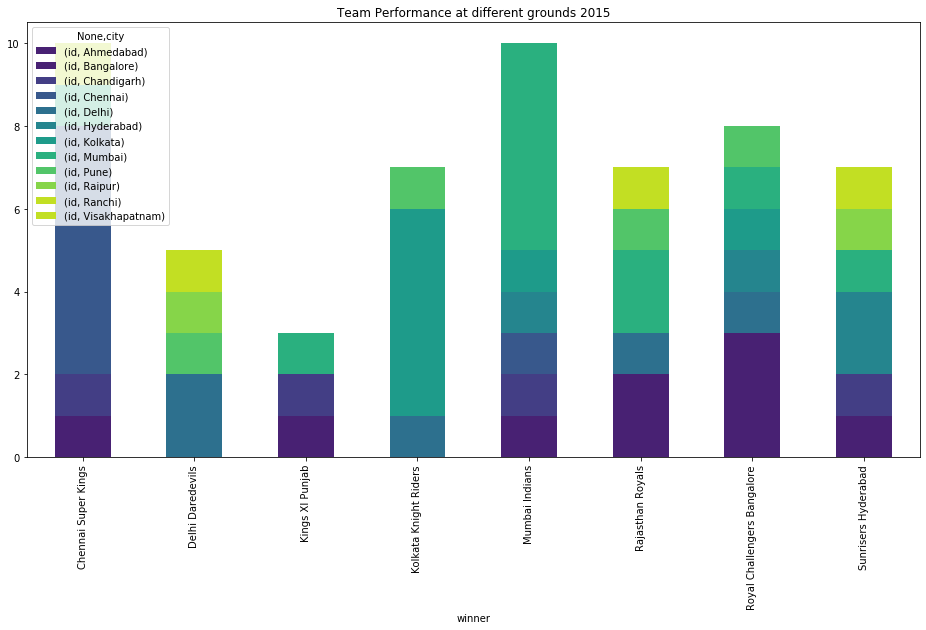

In [270]:
df_2015.plot(kind='bar',stacked='True',figsize=(16,8),colormap=ListedColormap(sn.color_palette("viridis", 10)))
plt.title('Team Performance at different grounds 2015')
plt.show()

In [202]:
df_2016= df[df['season']==2016]
df_2016 = df_2016.groupby(['winner','city'])[['id']].count().unstack()
df_2016

id                                    \
city                        Bangalore Chandigarh Delhi Hyderabad Kanpur   
winner                                                                    
Delhi Daredevils                  1.0        NaN   3.0       1.0    NaN   
Gujarat Lions                     NaN        1.0   1.0       NaN    2.0   
Kings XI Punjab                   NaN        2.0   NaN       NaN    NaN   
Kolkata Knight Riders             1.0        1.0   NaN       1.0    NaN   
Mumbai Indians                    1.0        1.0   NaN       NaN    NaN   
Rising Pune Supergiants           NaN        NaN   1.0       1.0    NaN   
Royal Challengers Bangalore       5.0        1.0   NaN       NaN    NaN   
Sunrisers Hyderabad               1.0        1.0   2.0       4.0    NaN   

                                                                             
city                        Kolkata Mumbai Pune Raipur Rajkot Visakhapatnam  
winner                                                                       
Delhi Daredevils                NaN    NaN  NaN    1.0    1.0           NaN  
Gujarat Lions                   1.0    1.0  1.0    NaN    2.0           NaN  
Kings XI Punjab                 NaN    NaN  NaN    NaN    1.0           1.0  
Kolkata Knight Riders           4.0    NaN  1.0    NaN    NaN           NaN  
Mumbai Indians                  1.0    2.0  1.0    NaN    NaN           1.0  
Rising Pune Supergiants         NaN    1.0  NaN    NaN    NaN           2.0  
Royal Challengers Bangalore     1.0    NaN  1.0    1.0    NaN           NaN  
Sunrisers Hyderabad             NaN    NaN  NaN    NaN    1.0           2.0

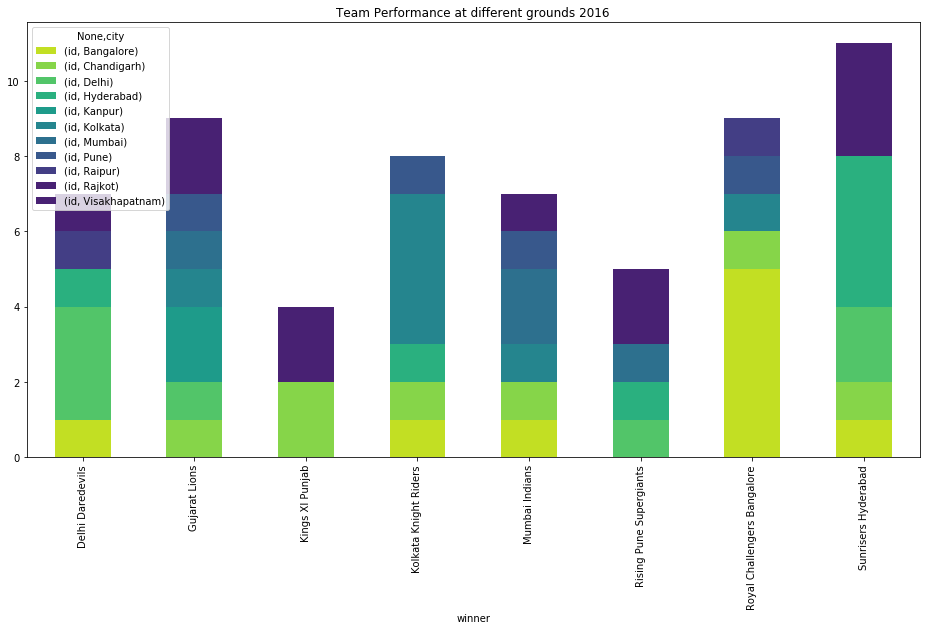

In [271]:
df_2016.plot(kind='bar',stacked='True',figsize=(16,8),colormap=ListedColormap(sn.color_palette("viridis_r", 10)))
plt.title('Team Performance at different grounds 2016')
plt.show()

In [204]:
df_2017= df[df['season']==2017]
df_2017 = df_2017.groupby(['winner','city'])[['id']].count().unstack()
df_2017

id                                    \
city                        Bangalore Chandigarh Delhi Hyderabad Indore   
winner                                                                    
Delhi Daredevils                  NaN        NaN   4.0       NaN    NaN   
Gujarat Lions                     1.0        1.0   NaN       NaN    NaN   
Kings XI Punjab                   1.0        2.0   NaN       NaN    2.0   
Kolkata Knight Riders             2.0        NaN   1.0       NaN    NaN   
Mumbai Indians                    2.0        NaN   1.0       1.0    1.0   
Rising Pune Supergiant            1.0        NaN   NaN       1.0    NaN   
Royal Challengers Bangalore       1.0        NaN   1.0       NaN    NaN   
Sunrisers Hyderabad               NaN        1.0   NaN       6.0    NaN   

                                                               
city                        Kanpur Kolkata Mumbai Pune Rajkot  
winner                                                         
Delhi Daredevils               1.0     NaN    NaN  1.0    NaN  
Gujarat Lions                  NaN     1.0    NaN  NaN    1.0  
Kings XI Punjab                NaN     NaN    1.0  NaN    1.0  
Kolkata Knight Riders          NaN     4.0    NaN  1.0    1.0  
Mumbai Indians                 NaN     1.0    5.0  NaN    1.0  
Rising Pune Supergiant         NaN     1.0    2.0  5.0    NaN  
Royal Challengers Bangalore    NaN     NaN    NaN  NaN    1.0  
Sunrisers Hyderabad            1.0     NaN    NaN  NaN    NaN

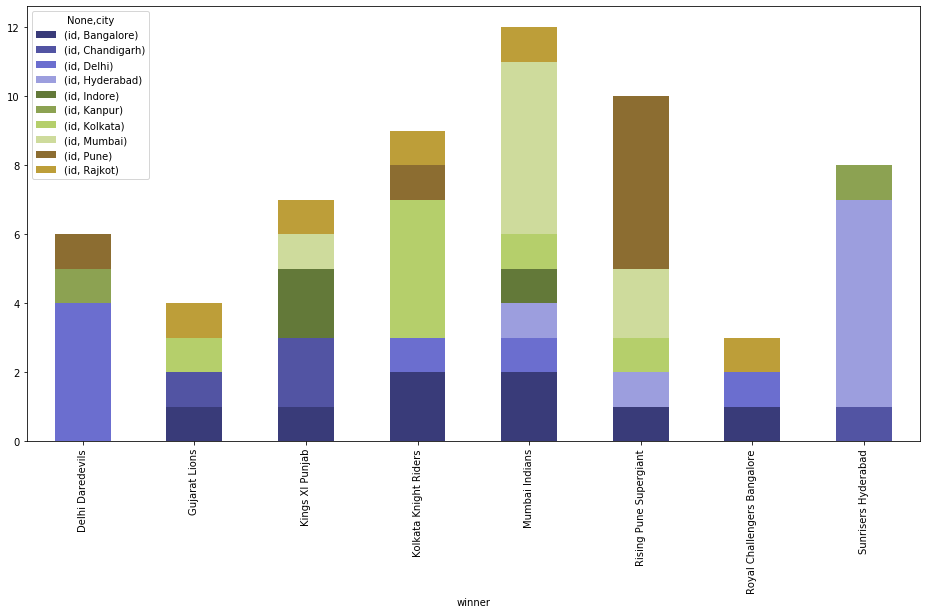

In [209]:
df_2017.plot(kind='bar',stacked='True',figsize=(16,8),colormap=ListedColormap(sn.color_palette("tab20b", 10)))

plt.show()

In [161]:
Colormap ReBu is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

In [210]:
df_toss = df[['toss_winner','winner']]

In [211]:
df_toss.shape

(636, 2)

In [212]:
df_tossw = df_toss[df_toss['toss_winner']==df_toss['winner']]

In [213]:
df_tossw.shape

(325, 2)

In [214]:
636-325

311

In [236]:
dftoss = pd.DataFrame({'Winner of toss winning':325,'Winner of toss losing':311},columns=['wins'],index=(['Winner of toss winning','Winner of toss losing']))

In [237]:
dict = {'Winner of toss winning':325,'Winner of toss losing':311}

In [238]:
dftoss['wins'] = dict.values()

In [240]:
dftoss.reset_index()

,index,wins
0,Winner of toss winning,325
1,Winner of toss losing,311


In [242]:
dftoss = dftoss.rename(columns={'index':'result'})

Text(0.5, 1.0, 'IMPACT OF TOSS ON RESULT ')

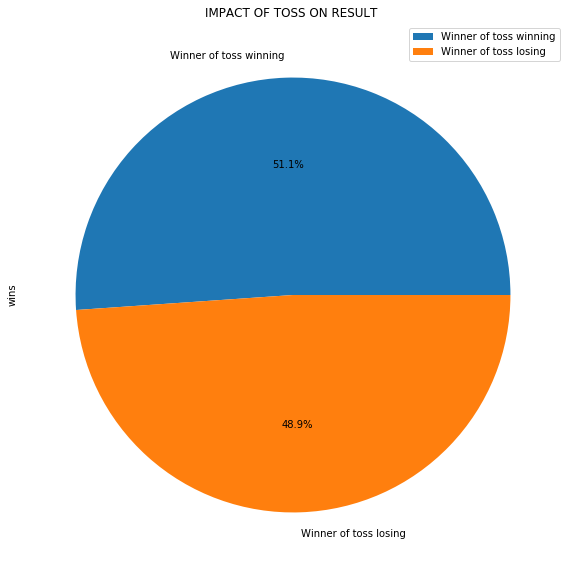

In [249]:
plot = dftoss.plot.pie(y='wins',figsize =(10,10),autopct='%1.1f%%')
plt.title('IMPACT OF TOSS ON RESULT ')

In [250]:
df_toss_dec = df.groupby(['toss_winner','toss_decision'])[['id']].count().unstack()
df_toss_dec

id      
toss_decision                 bat field
toss_winner                            
Chennai Super Kings          44.0  22.0
Deccan Chargers              24.0  19.0
Delhi Daredevils             26.0  46.0
Gujarat Lions                 1.0  14.0
Kings XI Punjab              25.0  43.0
Kochi Tuskers Kerala          3.0   5.0
Kolkata Knight Riders        30.0  48.0
Mumbai Indians               40.0  45.0
Pune Warriors                11.0   9.0
Rajasthan Royals             28.0  35.0
Rising Pune Supergiant        NaN   6.0
Rising Pune Supergiants       3.0   4.0
Royal Challengers Bangalore  20.0  50.0
Sunrisers Hyderabad          18.0  17.0

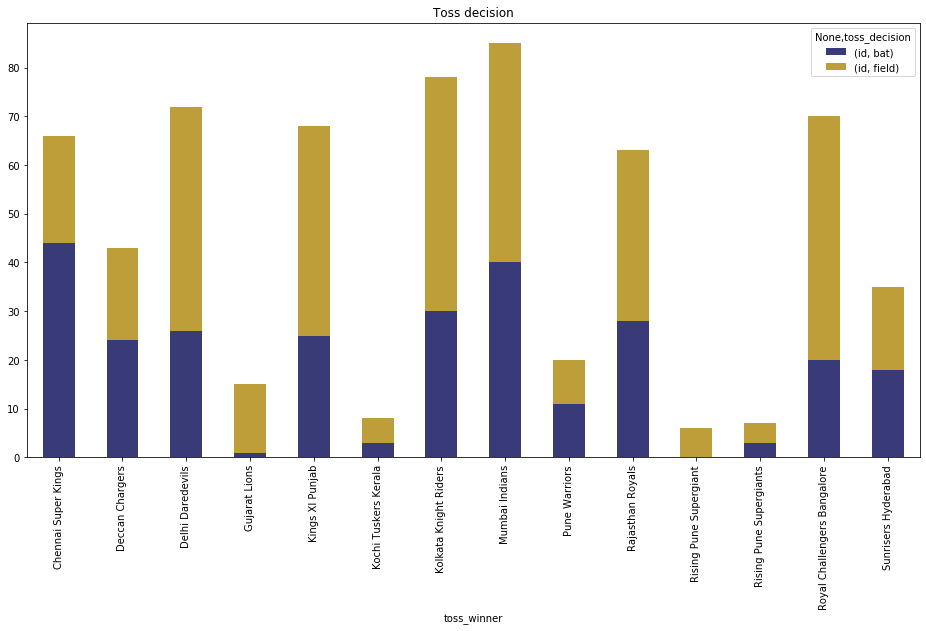

In [254]:
df_toss_dec.plot(kind='bar',stacked='True',figsize=(16,8),colormap=ListedColormap(sn.color_palette("tab20b", 10)))
plt.title('Toss decision')
plt.show()

In [258]:
df_venue=df[df['city'].isin(['Ahmedabad','Bangalore','Chandigarh','Chennai','Delhi','Hyderabad','Kolkata','Mumbai','Pune'])]

In [259]:
df_home_win = df_venue.groupby(['city','winner'])[['id']].count().unstack()
df_home_win

id                                                 \
winner     Chennai Super Kings Deccan Chargers Delhi Daredevils Gujarat Lions   
city                                                                            
Ahmedabad                  NaN             NaN              1.0           NaN   
Bangalore                  4.0             1.0              3.0           1.0   
Chandigarh                 3.0             NaN              1.0           2.0   
Chennai                   33.0             2.0              2.0           NaN   
Delhi                      5.0             2.0             23.0           1.0   
Hyderabad                  2.0             3.0              4.0           NaN   
Kolkata                    4.0             NaN              1.0           2.0   
Mumbai                     8.0             3.0              2.0           1.0   
Pune                       1.0             1.0              3.0           1.0   

                                                                       \
winner     Kings XI Punjab Kochi Tuskers Kerala Kolkata Knight Riders   
city                                                                    
Ahmedabad              1.0                  NaN                   NaN   
Bangalore              5.0                  NaN                   6.0   
Chandigarh            22.0                  NaN                   3.0   
Chennai                2.0                  NaN                   2.0   
Delhi                  4.0                  1.0                   5.0   
Hyderabad              4.0                  NaN                   4.0   
Kolkata                2.0                  1.0                  37.0   
Mumbai                 5.0                  1.0                   3.0   
Pune                   1.0                  NaN                   6.0   

                                                          \
winner     Mumbai Indians Pune Warriors Rajasthan Royals   
city                                                       
Ahmedabad             1.0           NaN              7.0   
Bangalore             8.0           NaN              3.0   
Chandigarh            4.0           1.0              3.0   
Chennai               3.0           1.0              1.0   
Delhi                 3.0           1.0              4.0   
Hyderabad             5.0           1.0              2.0   
Kolkata               9.0           NaN              1.0   
Mumbai               45.0           3.0              5.0   
Pune                  3.0           4.0              2.0   

                                                           \
winner     Rising Pune Supergiant Rising Pune Supergiants   
city                                                        
Ahmedabad                     NaN                     NaN   
Bangalore                     1.0                     NaN   
Chandigarh                    NaN                     NaN   
Chennai                       NaN                     NaN   
Delhi                         NaN                     1.0   
Hyderabad                     1.0                     1.0   
Kolkata                       1.0                     NaN   
Mumbai                        2.0                     1.0   
Pune                          5.0                     NaN   

                                                            
winner     Royal Challengers Bangalore Sunrisers Hyderabad  
city                                                        
Ahmedabad                          1.0                 1.0  
Bangalore                         30.0                 2.0  
Chandigarh                         3.0                 4.0  
Chennai                            2.0                 NaN  
Delhi                              5.0                 4.0  
Hyderabad                          2.0                20.0  
Kolkata                            3.0                 NaN  
Mumbai                             5.0                 1.0  
Pune                               4.0               

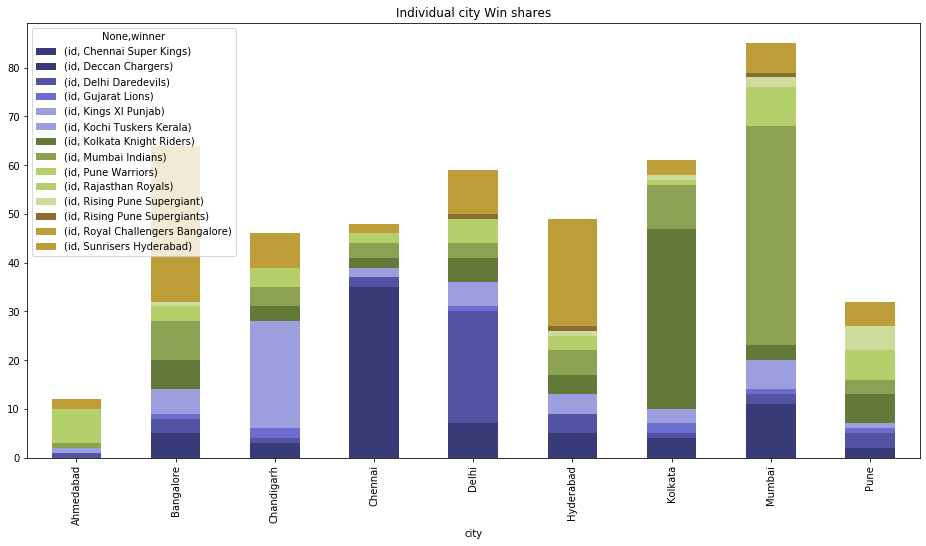

In [261]:
df_home_win.plot(kind='bar',stacked='True',figsize=(16,8),colormap=ListedColormap(sn.color_palette("tab20b", 10)))
plt.title('Individual city Win shares')
plt.show()